In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

from utils import morisita_child_adult, per_session_plot
from dataset import get_manchester

def spearman_child_adult(df):
    child = df.speaker.eq('CHI')
    adult = df.speaker.eq('MOT')
    a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(), fill_value=0)
    result = spearmanr(a, b)
    return result.correlation

def pearson_child_adult(df):
    child = df.speaker.eq('CHI')
    adult = df.speaker.eq('MOT')
    a, b = df[child].ngram.value_counts().align(df[adult].ngram.value_counts(), fill_value=0)
    result = pearsonr(a, b)
    return result[0]

In [ ]:
unigrams, bigrams, trigrams = get_manchester(
    "/home/paul/corpora/Manchester/**/*", 
    cached=True, 
    gram_sizes=[1,2,3])

/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/paul/.virtualenvs/formulae/lib/python3.6/site-packages/scipy/stats/stat

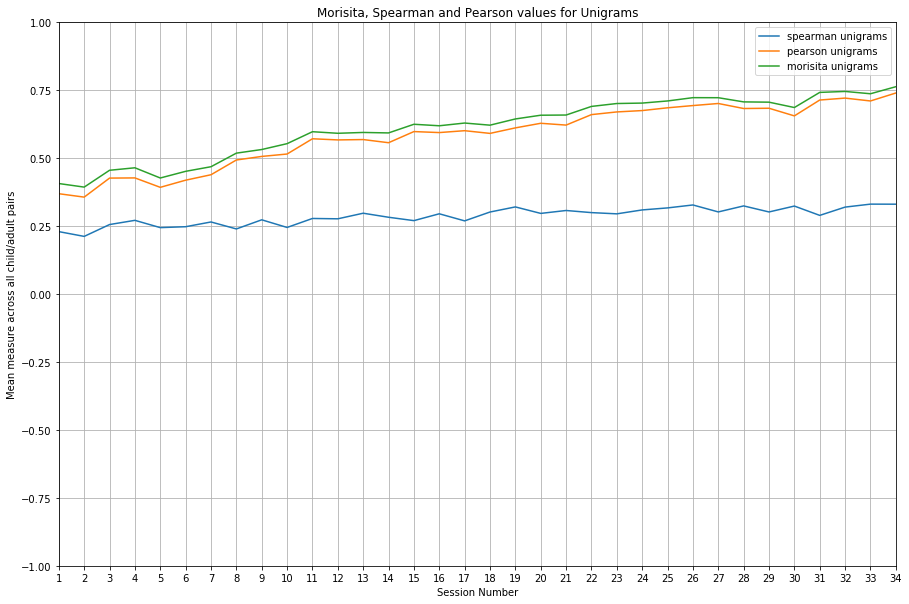

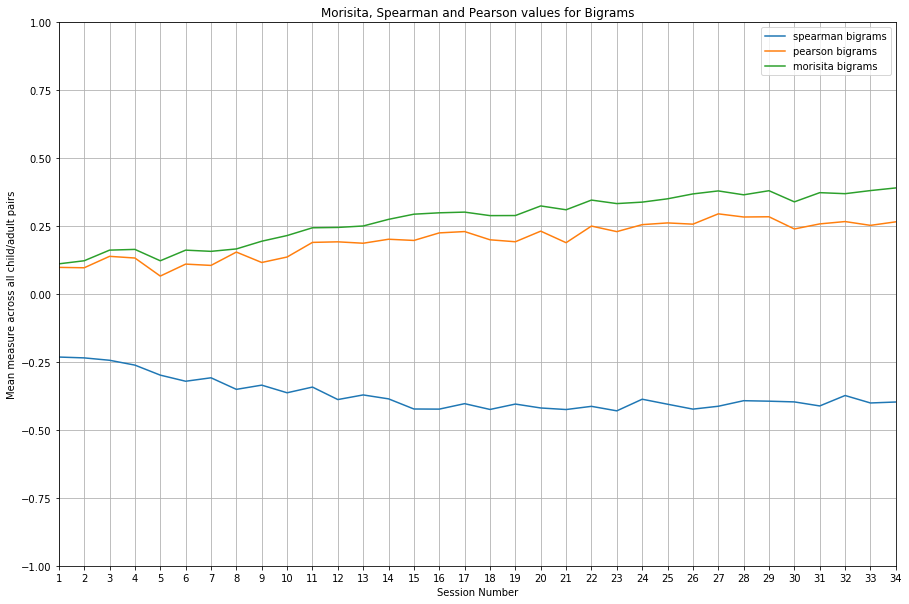

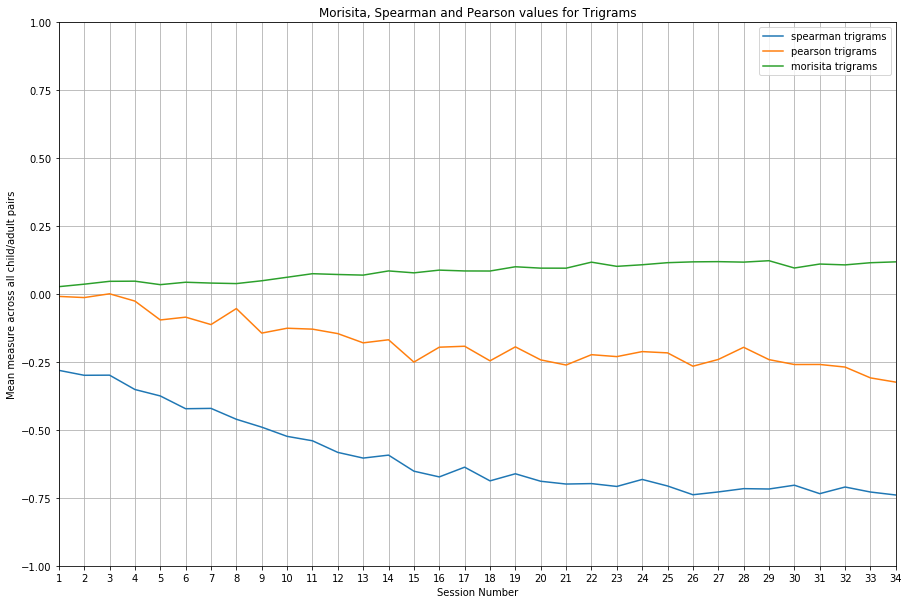

In [16]:
plt.rcParams['figure.figsize'] = 15, 10

for df, label, style in zip((unigrams, bigrams, trigrams), 
                     ('unigrams', 'bigrams', 'trigrams'),
                     ('-', '--', '-^')):
    plt.ylim(-1, 1)
    (
        df
        .groupby(['corpus', 'session'])
        .apply(spearman_child_adult)
        .groupby(level='session')
        .mean()
        .plot(label='spearman {}'.format(label))
    )
    (
        df
        .groupby(['corpus', 'session'])
        .apply(pearson_child_adult)
        .groupby(level='session')
        .mean()
        .plot(label='pearson {}'.format(label))
    )
    (
        df
        .groupby(['corpus', 'session'])
        .apply(morisita_child_adult)
        .groupby(level='session')
        .mean()
#         .mul(2)
#         .sub(1)
        .plot(label='morisita {}'.format(label))
    )
    per_session_plot('Morisita, Spearman and Pearson values for {}'.format(label.capitalize()), 
                     ylabel='Mean measure across all child/adult pairs')